In [1]:
!pip install matplotlib
!pip install ipywidgets
!pip install pandas
!pip install openpyxl
!pip install seaborn
!pip install numpy
!pip install scikit-learn

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("./norm-z/SUS TRA B1 412 FAHU 001.csv", index_col = 0, parse_dates = [0])

In [4]:
df.head()

,Extract Fan VFD Speed Feedback (percent),Supply Air Humidity (percent),Valve Command (percent),Supply Air Flow Velocity (liters per second),Space Air CO2 (parts per million),Return Air Flow Velocity (liters per second),CHW Return Temperature (celsius),Off Coil Temperature (celsius),On Coil Humidity (percent),Return Air CO2 (parts per million),Space Air VOC (parts per million),CHW Supply Temperature (celsius),Exhaust Air Humidity (percent),Return Air Humidity After HRW (percent),Supply Fan VFD Speed Command (percent),Supply Air Pressure (pascal),Extract Fan VFD Speed Command (percent),Supply Fan VFD Speed Feedback (percent),Valve Position (percent)
Date Time,,,,,,,,,,,,,,,,,,,
2024-06-01 00:00:00,-1.413110,0.816938,-0.026711,-0.853950,0.063859,-0.154898,-0.973049,-0.009076,1.091230,0.002977,0.181112,0.099272,0.013380,0.764134,-1.408704,-0.777431,-1.086468,-1.256018,0.006911
2024-06-01 00:00:00,-1.361512,0.779486,-0.026711,-0.841899,0.063859,-0.193790,-1.008584,-0.009076,1.043444,0.002977,0.181112,0.099272,0.013380,0.728899,-1.463988,0.505246,-1.126268,-1.204954,0.006911
2024-06-01 00:01:00,-0.690736,0.788849,0.028720,-0.449012,0.063839,-0.840250,-1.044119,-0.021639,1.051408,2.853051,0.181074,0.005844,0.013353,0.740644,-0.717648,0.528309,-0.688471,-0.592191,0.034299
2024-06-01 00:02:00,-1.051923,0.798212,0.024024,-0.629769,0.063818,0.104738,-1.079654,-0.034203,1.059373,2.861981,0.181036,-0.087584,0.013326,0.752389,-0.994070,0.654271,-0.807870,-0.847509,0.185250
2024-06-01 00:02:00,-1.103521,0.807575,0.019327,-0.157515,0.063797,-0.161204,-1.115189,-0.046766,1.067337,2.870911,0.180998,-0.181012,0.013299,0.758261,-0.855859,0.157522,-0.728271,-0.873041,0.024864


In [5]:
# Drop Total Energy
#df.drop("Total Energy (kilowatt hour)", axis = 1, inplace = True)

In [6]:
# Add temporal features
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

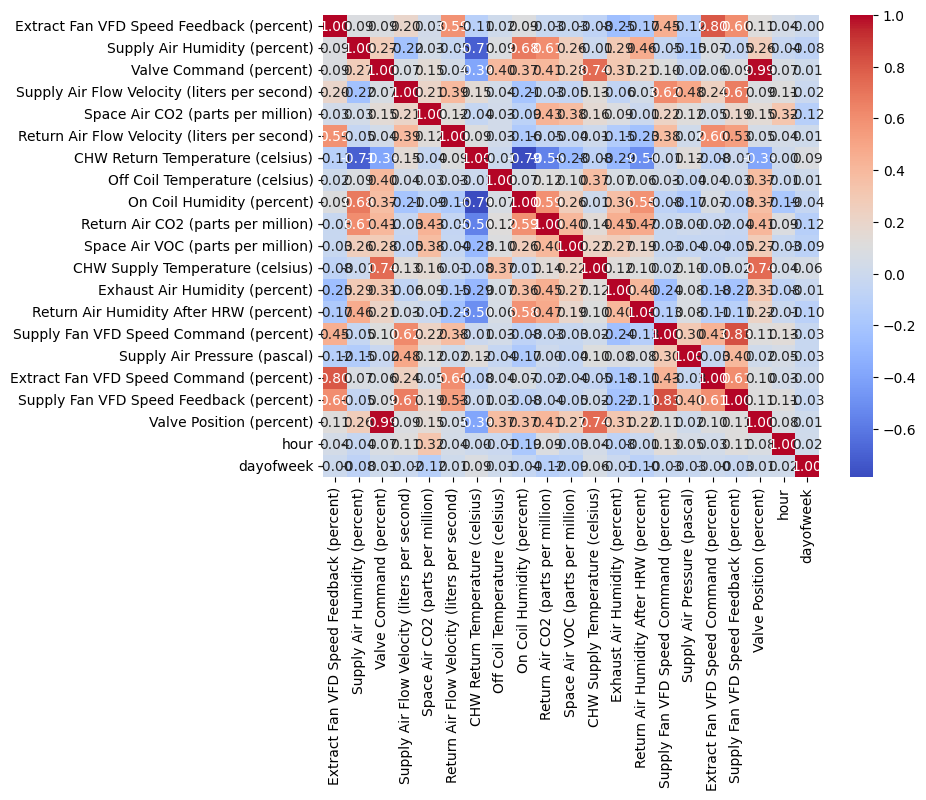

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

In [8]:
from ipywidgets import widgets

def plot_large_heatmap(correlation_matrix):
    fig, ax = plt.subplots(figsize=(40, 40))  # Adjust the size to your needs
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)

    # Save figure as a temporary file and load it into a widget for scrolling
    plt.tight_layout()
    plt.savefig("temp_heatmap.png", bbox_inches='tight')
    plt.close(fig)

    # Create a scrollable frame
    scrollable_output = widgets.Output()
    with scrollable_output:
        from IPython.display import Image
        display(Image("temp_heatmap.png"))

    # Add scrolling
    scrollable_output.layout = widgets.Layout(
        overflow='scroll',
        width='2000px',  # Adjust horizontal scroll size
        height='1200px',  # Adjust vertical scroll size
    )
    display(scrollable_output)

plot_large_heatmap(correlation_matrix)

Output(layout=Layout(height='1200px', overflow='scroll', width='2000px'))

In [9]:
df.columns

Index(['Extract Fan VFD Speed Feedback (percent)',
       'Supply Air Humidity (percent)', 'Valve Command (percent)',
       'Supply Air Flow Velocity (liters per second)',
       'Space Air CO2 (parts per million)',
       'Return Air Flow Velocity (liters per second)',
       'CHW Return Temperature (celsius)', 'Off Coil Temperature (celsius)',
       'On Coil Humidity (percent)', 'Return Air CO2 (parts per million)',
       'Space Air VOC (parts per million)', 'CHW Supply Temperature (celsius)',
       'Exhaust Air Humidity (percent)',
       'Return Air Humidity After HRW (percent)',
       'Supply Fan VFD Speed Command (percent)',
       'Supply Air Pressure (pascal)',
       'Extract Fan VFD Speed Command (percent)',
       'Supply Fan VFD Speed Feedback (percent)', 'Valve Position (percent)',
       'hour', 'dayofweek'],
      dtype='object')

## Drop Time-related Columns

In [10]:
df.drop("hour", axis = 1, inplace = True)
df.drop("dayofweek", axis = 1, inplace = True)

## Drop Highly-correlated Columns

In [11]:
df.drop("Valve Command (percent)", axis = 1, inplace = True)
df.drop("Extract Fan VFD Speed Command (percent)", axis = 1, inplace = True)
df.drop("Supply Fan VFD Speed Command (percent)", axis = 1, inplace = True)
df.drop("CHW Supply Temperature (celsius)", axis = 1, inplace = True)
df.drop("CHW Return Temperature (celsius)", axis = 1, inplace = True)

## Correlation Test Again

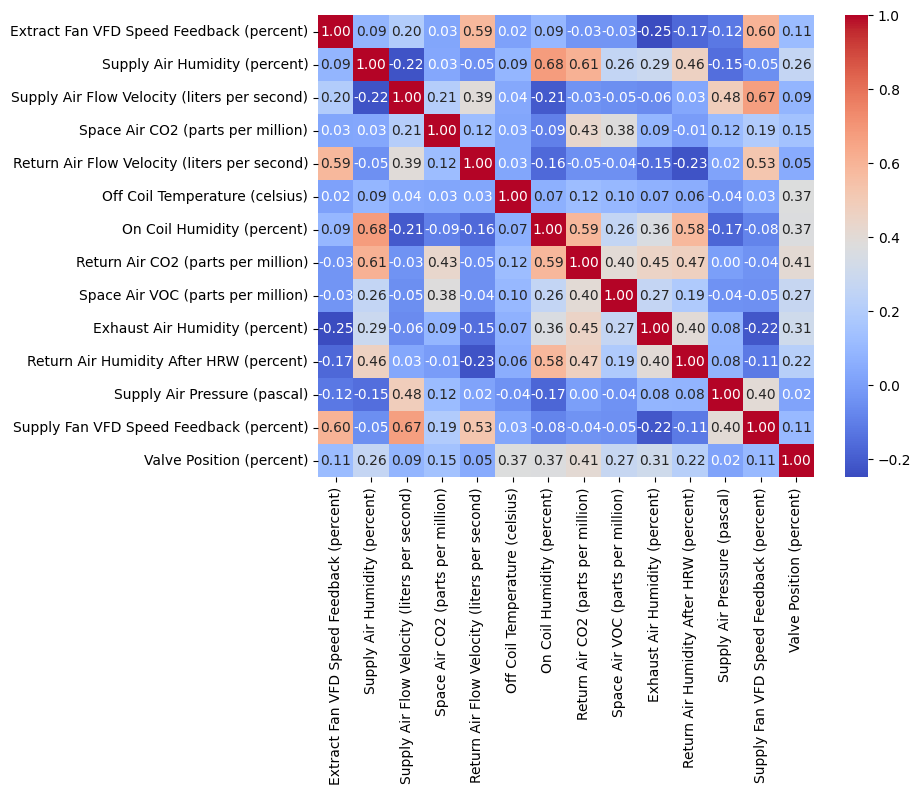

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

# PCA

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# Skip it since it's already scaled
#scaler = StandardScaler()
#standardized_data = scaler.fit_transform(df)
standardized_data = df

## n_components = 2

In [15]:
pca = PCA(n_components=2)  # Example: Reduce to 2 components

# Fit and transform the data
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
print(pca_df)

# Explained variance ratio (how much variance each principal component explains)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Cumulative explained variance
print("Cumulative Explained Variance:", sum(pca.explained_variance_ratio_))

             PC1       PC2
0       1.693675 -1.586807
1       1.536483 -1.265057
2       2.624590 -0.243520
3       2.618764 -0.144746
4       2.608178 -0.230628
...          ...       ...
136132 -4.024349 -2.436637
136133 -3.999911 -2.612826
136134 -3.827793 -2.494694
136135 -3.864838 -3.050727
136136 -4.064149 -2.655267

[136137 rows x 2 columns]
Explained Variance Ratio: [0.256427   0.19191637]
Cumulative Explained Variance: 0.448343372573241


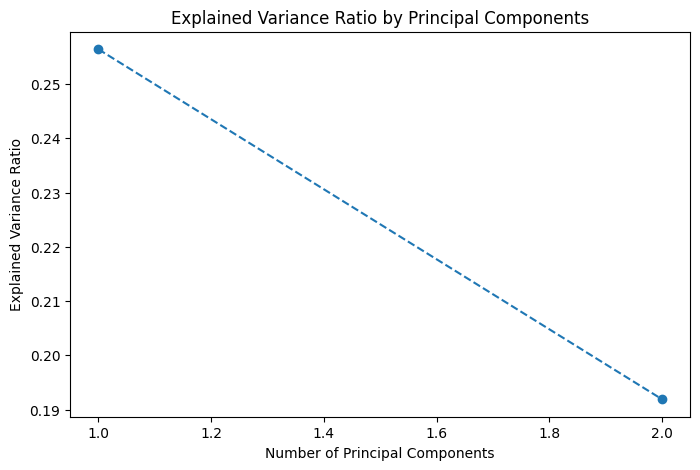

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

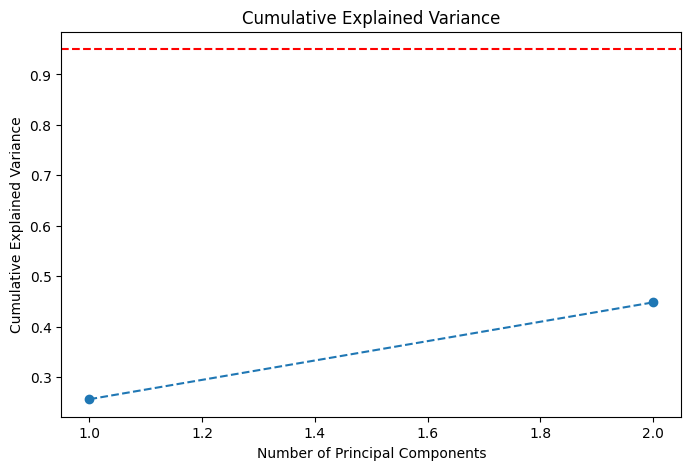

StopIteration: 

In [17]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), 
         cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # Mark the 95% threshold
plt.show()

# Find the number of components needed for 95% explained variance
n_components_95 = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.95) + 1
print(f"Number of components for 95% explained variance: {n_components_95}")

In [18]:
# Retain 95% variance
pca_95 = PCA(n_components=0.95)
reduced_data = pca_95.fit_transform(standardized_data)

# Number of components chosen
print(f"Number of components selected: {pca_95.n_components_}")

Number of components selected: 11


In [19]:
pca = PCA(n_components=11)
reduced_data = pca.fit_transform(standardized_data)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.cumsum())

# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(11)])
print(reduced_df)

Explained Variance Ratio: [0.256427   0.19191637 0.11504166 0.09162415 0.08173371 0.05001779
 0.04433786 0.04021025 0.03622429 0.02713775 0.02312981]
Cumulative Explained Variance: [0.256427   0.44834337 0.56338503 0.65500918 0.7367429  0.78676069
 0.83109855 0.8713088  0.90753309 0.93467084 0.95780065]
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       1.693675 -1.586807 -0.243089  0.029776 -0.162257 -0.266531 -0.288130   
1       1.536483 -1.265057  0.453230 -0.358238 -0.109934 -0.407109 -0.064339   
2       2.624590 -0.243520  0.570795 -0.325776 -0.618748 -0.931096 -0.680384   
3       2.618764 -0.144746  0.508718 -0.205138 -0.589868 -0.534364 -0.930925   
4       2.608178 -0.230628  0.483065 -0.182971 -0.644240 -0.617748 -1.003220   
...          ...       ...       ...       ...       ...       ...       ...   
136132 -4.024349 -2.436637 -2.001764  1.138356  0.126522  0.706122  0.595046   
136133 -3.999911 -2.612826 -2.543236  1.481682  0.17021

# 1. Isolation Forest

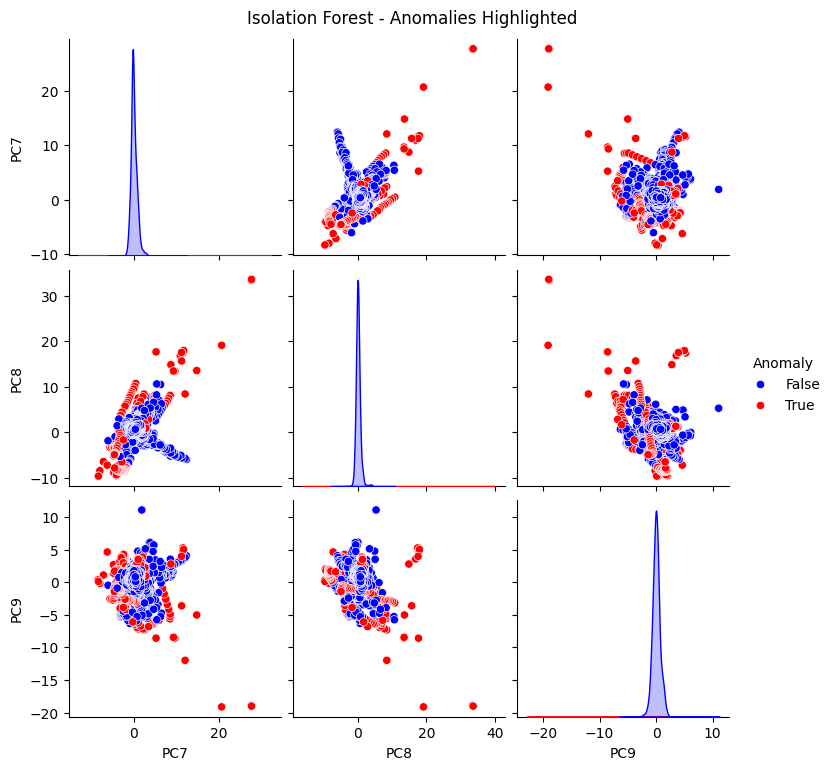

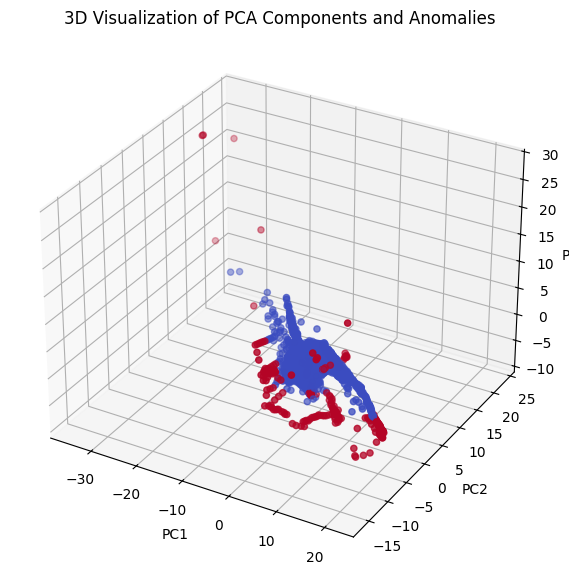

In [26]:
isolation_forest = IsolationForest(contamination=0.002, random_state=42)  # Adjust contamination if needed
anomaly_scores = isolation_forest.fit_predict(reduced_df)  # -1 for anomalies, 1 for normal points
anomalies = anomaly_scores == -1  # Boolean mask for anomalies

# Add the anomaly labels to a DataFrame
pca_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(11)])
pca_df['Anomaly'] = anomalies

# Step 4: Visualize Results (Pairplot with Seaborn)
sns.pairplot(pca_df, vars=["PC7", "PC8", "PC9"], hue="Anomaly", palette={True: "red", False: "blue"})
plt.suptitle("Isolation Forest - Anomalies Highlighted", y=1.02)
plt.show()

# Step 5: Visualize in 3D (Optional)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df["PC5"], pca_df["PC6"], pca_df["PC7"], c=pca_df["Anomaly"], cmap="coolwarm", marker="o")
ax.set_title("3D Visualization of PCA Components and Anomalies")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# 2. k-Means Clustering

### 2.1 Case k=3

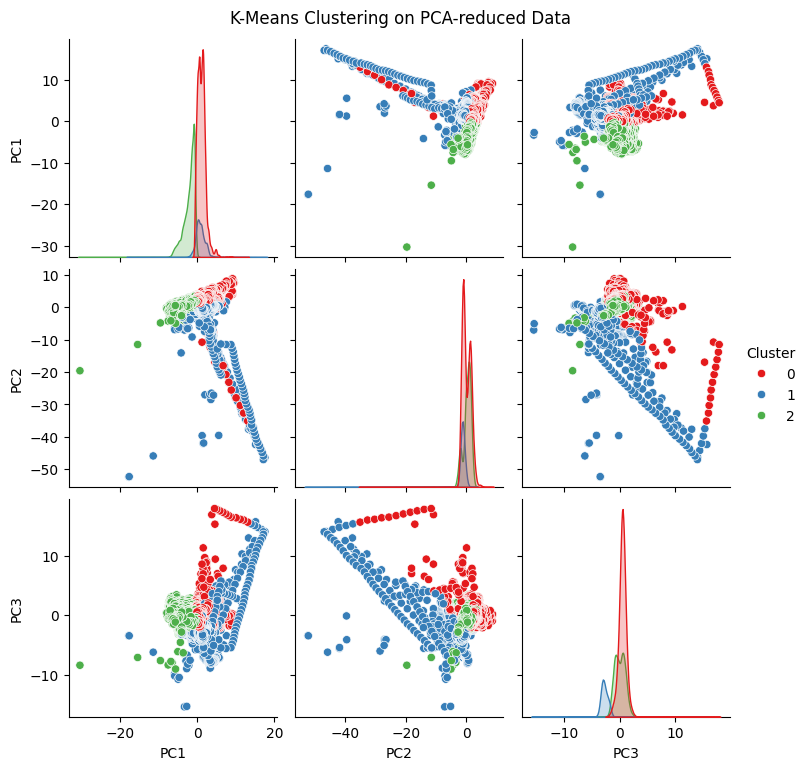

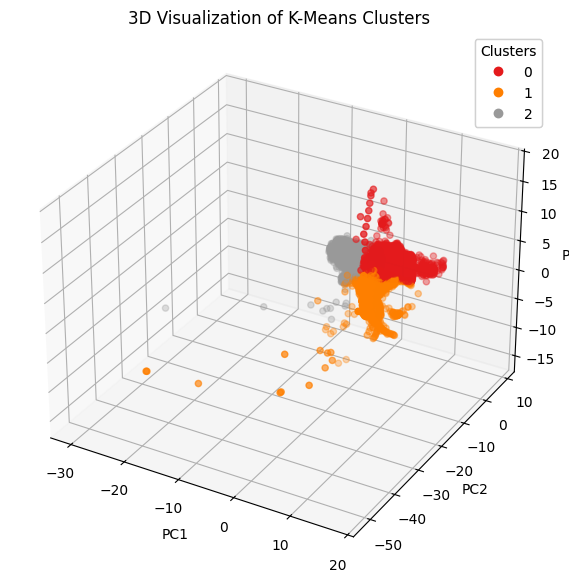

In [42]:
def k_means_cluster(k = 3):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_df)
    
    # Add the cluster labels to the DataFrame
    pca_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(11)])
    pca_df['Cluster'] = cluster_labels
    
    # Step 4: Visualize the Clusters (Pairplot with Seaborn)
    sns.pairplot(pca_df, vars=["PC1", "PC2", "PC3"], hue="Cluster", palette="Set1")
    plt.suptitle("K-Means Clustering on PCA-reduced Data", y=1.02)
    plt.show()
    
    # Step 5: Visualize in 3D (Optional)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pca_df["Cluster"], cmap="Set1", marker="o")
    ax.set_title("3D Visualization of K-Means Clusters")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    
    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    
    plt.show()

k_means_cluster(3)

### 2.2 k Optimization by Elbow/Silhouette Scores

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
for k in range(2, 10):  # Try cluster numbers from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_df)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest centroid
    silhouette_scores.append(silhouette_score(reduced_df, kmeans.labels_))

# Plot Inertia and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)

plt.tight_layout()
plt.show()

### 2.3 Case k=2

In [ ]:
k_means_cluster(2)

# 3. Hierarchical Clustering

### 3.1 Linkage Method = "ward"

In [51]:
def hierarchical_cluster(linkage_method):   # Use 'ward', 'single', or 'complete'
    linkage_matrix = linkage(reduced_df, method=linkage_method)  # 'ward' minimizes variance within clusters

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    dendrogram(linkage_matrix, truncate_mode='level', p=3)  # Truncate to the last 5 levels for readability
    plt.show()
    
    # Step 4: Assign Clusters Using Agglomerative Clustering
    n_clusters = 3  # Set desired number of clusters
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    cluster_labels = hierarchical_clustering.fit_predict(reduced_df)
    
    # Add cluster labels to a DataFrame
    pca_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(11)])
    pca_df['Cluster'] = cluster_labels
    
    # Step 5: Visualize Clusters in 2D (Pairplot with Seaborn)
    sns.pairplot(pca_df, vars=["PC1", "PC2", "PC3"], hue="Cluster", palette="Set1")
    plt.suptitle("Hierarchical Clustering on PCA-Reduced Data", y=1.02)
    plt.show()
    
    # Step 6: Visualize Clusters in 3D (Optional)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pca_df["Cluster"], cmap="Set1", marker="o")
    ax.set_title("3D Visualization of Hierarchical Clusters")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    
    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    
    plt.show()

hierarchical_cluster("ward")

MemoryError: Unable to allocate 69.0 GiB for an array with shape (9266573316,) and data type float64

### 3.2 Linkage Method = "single"

In [ ]:
hierarchical_cluster("single")

### 3.3 Linkage Method = "complete"

In [ ]:
hierarchical_cluster("complete")

# 4. DBSCAN Clustering

### 4.1 eps=0.5

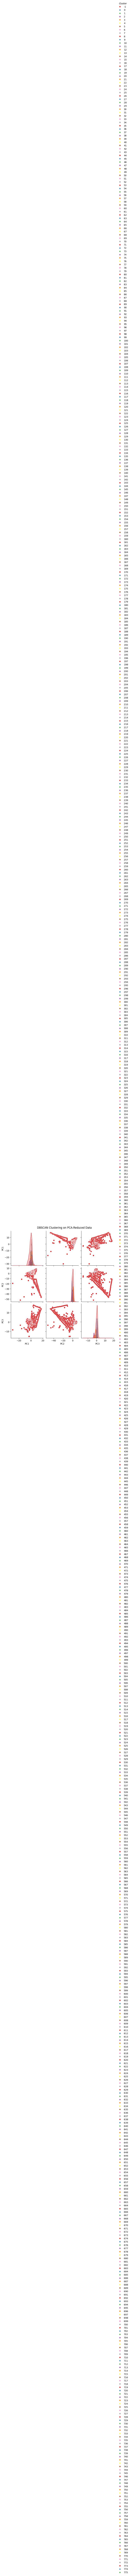

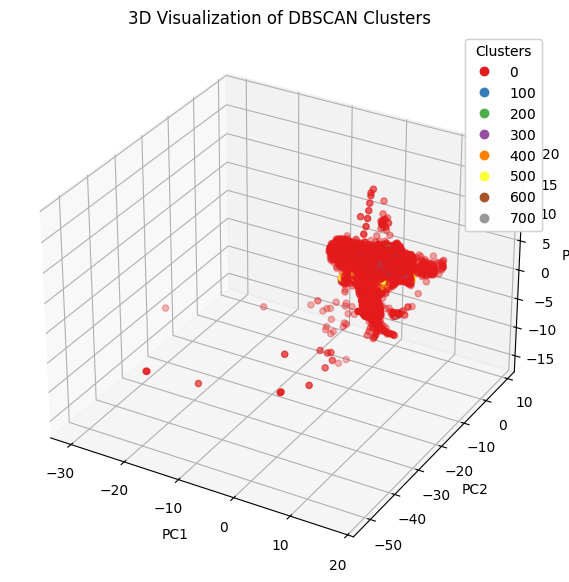

In [52]:
def dbscan_cluster(eps): # Maximum distance for two points to be considered neighbors
    dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples for your dataset
    cluster_labels = dbscan.fit_predict(reduced_df)
    
    # Add cluster labels to a DataFrame
    pca_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(11)])
    pca_df['Cluster'] = cluster_labels
    
    # Step 4: Visualize Clusters in 2D (Pairplot with Seaborn)
    sns.pairplot(pca_df, vars=["PC1", "PC2", "PC3"], hue="Cluster", palette="Set1")
    plt.suptitle("DBSCAN Clustering on PCA-Reduced Data", y=1.02)
    plt.show()
    
    # Step 5: Visualize Clusters in 3D (Optional)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pca_df["Cluster"], cmap="Set1", marker="o")
    ax.set_title("3D Visualization of DBSCAN Clusters")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    
    # Add legend
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    
    plt.show()

dbscan_cluster(0.5)

### 4.2 Eps Optimization

In [ ]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)  # n_neighbors = min_samples
nearest_neighbors.fit(X_scaled)
distances, _ = nearest_neighbors.kneighbors(X_scaled)

# Sort and plot distances
distances = np.sort(distances[:, -1])  # Sort by the kth nearest neighbor distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Elbow Method for Choosing eps', fontsize=16)
plt.xlabel('Points sorted by distance to 5th nearest neighbor', fontsize=14)
plt.ylabel('Distance to 5th nearest neighbor', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### 4.3 eps=0.25

In [ ]:
dbscan_cluster(0.25)